In [ ]:
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from classes import Deck
from functions import hand_to_data_dict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import joblib

In [ ]:
def create_data_in_list(lst: list, n: int, n_cards: int):
    if n_cards > 4 and n_cards < 1:
        raise ValueError("Param n_cards should have value from 1 to 4")
    
    for i in range(n):
        deck = Deck()
        deck.shuffle()
        hand = []
        for i in range(n_cards):
            hand.append(deck.get_card())

        data_dict = hand_to_data_dict(hand)
        if data_dict["Total_val"] >= 21:
            continue

        next_card = deck.get_card().get_value()
        if next_card + data_dict["Total_val"] > 21:
            decision = 0
        else:
            decision = 1

        data_dict["Decision"] = decision
        lst.append(data_dict)

In [2]:
data_lst = []
create_data_in_list(lst=data_lst, n = 500, n_cards=1)
create_data_in_list(lst=data_lst, n = 500, n_cards=2)
create_data_in_list(lst=data_lst, n = 500, n_cards=3)
create_data_in_list(lst=data_lst, n = 500, n_cards=4)

random.shuffle(data_lst)
df = pd.DataFrame(data_lst)
df.head()

,Card_1,Card_2,Card_3,Card_4,Total_val,Decision
0,8,6,4,0,18,0
1,3,3,5,0,11,1
2,6,0,0,0,6,1
3,10,0,0,0,10,1
4,8,0,0,0,8,1


C:\Users\Wiktor\AppData\Local\Temp\ipykernel_12204\92135304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Decision'], order=df['Decision'].value_counts().index, palette="viridis")


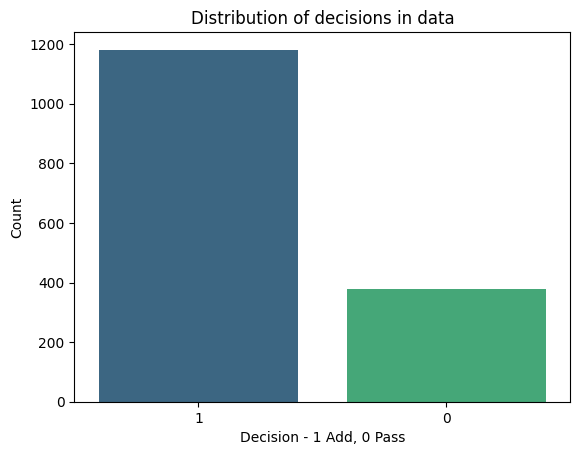

In [3]:
sns.countplot(x=df['Decision'], order=df['Decision'].value_counts().index, palette="viridis")
plt.title("Distribution of decisions in data")
plt.xlabel("Decision - 1 Add, 0 Pass")
plt.ylabel("Count")
plt.show()

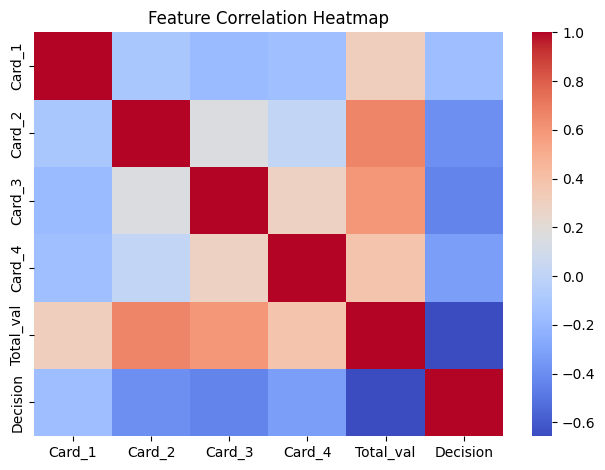

In [4]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [5]:
labels = df["Decision"]
features = df.drop(columns=["Decision"])

f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=0.2)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestClassifier()
}

best_model_name = ""
best_acc = 0
for name, model in models.items():
    model.fit(f_train, l_train)
    pred = model.predict(f_test)
    pred = (pred >= 0.5).astype(int)
    accuracy = accuracy_score(l_test, pred)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy)
    print(classification_report(l_test, pred))
    if accuracy > best_acc:
        models[name] = model
        best_model_name = name

model = models[best_model_name]
joblib.dump(model, 'model.pkl')


Model: Logistic Regression
Accuracy: 0.8942307692307693
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        59
           1       0.94      0.93      0.93       253

    accuracy                           0.89       312
   macro avg       0.83      0.83      0.83       312
weighted avg       0.89      0.89      0.89       312


Model: Linear Regression
Accuracy: 0.8878205128205128
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        59
           1       0.94      0.92      0.93       253

    accuracy                           0.89       312
   macro avg       0.81      0.83      0.82       312
weighted avg       0.89      0.89      0.89       312


Model: Random Forest
Accuracy: 0.8685897435897436
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        59
           1       0.93      0.91      0.92       253

    accuracy       

['model.pkl']